<a href="https://colab.research.google.com/github/B-Srikar/SCT_ML_3/blob/main/Dogsvscats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/c/dogs-vs-cats/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: srikar9024
Your Kaggle Key: ··········


100%|██████████| 812M/812M [00:04<00:00, 205MB/s] 



Extracting archive ./dogs-vs-cats/dogs-vs-cats.zip to ./dogs-vs-cats


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/dogs-vs-cats/sampleSubmission.csv")

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 745s 1s/step - accuracy: 0.6374 - loss: 0.6647 - val_accuracy: 0.7610 - val_loss: 0.4910
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 730s 1s/step - accuracy: 0.7746 - loss: 0.4700 - val_accuracy: 0.7780 - val_loss: 0.4599
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 729s 1s/step - accuracy: 0.8390 - loss: 0.3677 - val_accuracy: 0.8004 - val_loss: 0.4338
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 737s 1s/step - accuracy: 0.8922 - loss: 0.2615 - val_accuracy: 0.7986 - val_loss: 0.4829
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 743s 1s/step - accuracy: 0.9489 - loss: 0.1358 - val_accuracy: 0.7732 - val_loss: 0.6574


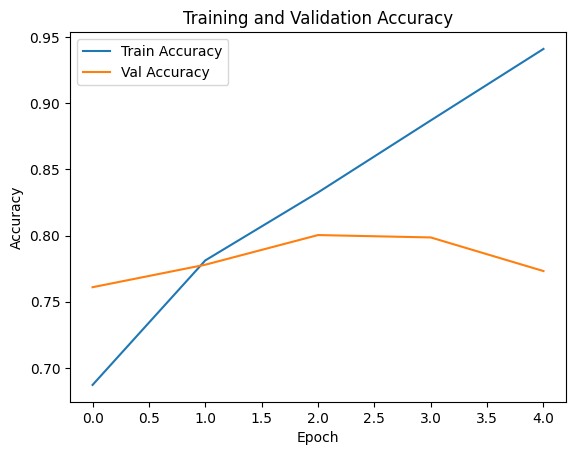

In [ ]:
import os
import zipfile
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# STEP 1: Unzip the dataset
zip_path = "/content/dogs-vs-cats/train.zip"
extract_path = "train_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# STEP 2: Move cat and dog images to subfolders
base_dir = "data"
train_dir = os.path.join(base_dir, "train")
cat_dir = os.path.join(train_dir, "cats")
dog_dir = os.path.join(train_dir, "dogs")

os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

# Move images into respective folders
source_dir = os.path.join(extract_path, "train")
for fname in os.listdir(source_dir):
    if fname.startswith("cat"):
        shutil.move(os.path.join(source_dir, fname), cat_dir)
    elif fname.startswith("dog"):
        shutil.move(os.path.join(source_dir, fname), dog_dir)

# STEP 3: Data preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# STEP 4: Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# STEP 5: Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

# STEP 6: Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# (Optional) STEP 7: Save model
model.save("dog_cat_classifier.h5")